# NUS Datathon 2025 Category A (Group 8)

## Introduction: Optimizing Financial Advisor Matching with Data Science

In today’s digital age, financial institutions are increasingly leveraging data science to enhance customer experience and improve business performance. One key challenge in the financial advisory sector is ensuring that customers are matched with the right financial advisors who can best meet their unique needs. An optimal match can lead to better engagement, higher conversion rates, and greater customer satisfaction, ultimately driving revenue growth.

This datathon presents a unique opportunity for us to tackle this real-world challenge by developing a data-driven model that recommends the most suitable financial advisors for individual customers. By utilizing various machine learning techniques such as supervised learning - we aim to create an intelligent system that can effectively assign financial advisors to customers, optimizing engagement and improving the likelihood of successful policy conversions.

## Connecting To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


------------------------------------------------------------------------------------------------------------------------------------------

## Importing The Necessary Packages

The packages that we need to install are

*   pandas (for data cleaning and manipulation)
*   numpy
*   matplotlib (for data visualisations)
*   seaborn (for data visualisations)
*   sklearn (for machine learning)
*   !! OTHERS WE WILL DISCUSS SUBSEQUENTLY







In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

------------------------------------------------------------------------------------------------------------------------------------------

## Reading The Parquet Files

There are three necessary files that we need to view and analyse - the **Policy Information**, **Client Information** and **Agent Information**. Since the three files are in **Parquet format**, we can rely on the `pd.read_parquet` method to read the three files. Subsequently, we can use the `.head()` method to observe the first 5 rows of each dataset.

#### Dataset 1: Policy Information

In [ ]:
# Extracting the policy information parquet file from Google Colab
policy_info = '/content/drive/MyDrive/nus_policy_info_df.parquet'

# Reading the policy information parquet file
df_policy = pd.read_parquet(policy_info)

# Viewing the first few rows of the policy information dataset
df_policy.head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr


#### Dataset 2: Client Information

In [ ]:
# Extracting the client information parquet file from Google Colab
client_info = '/content/drive/MyDrive/nus_client_info_df.parquet'

# Reading the client information parquet file
df_client = pd.read_parquet(client_info)

# Viewing the first few rows of the client information dataset
df_client.head()

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80


#### Dataset 3: Agent Information

In [ ]:
# Extracting the agent information parquet file from Google Colab
agent_info = '//content/drive/MyDrive/nus_agent_info_df.parquet'

# Reading the agent information parquet file
df_agent = pd.read_parquet(agent_info)

# Viewing the first few rows of the agent information dataset
df_agent.head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,...,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,AIN:9513,32.0,M,M,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,"[prod_2, prod_6]"
1,AIN:4310,40.0,M,M,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,...,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,[prod_6]
2,AIN:4302,39.0,F,M,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,...,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,[prod_4]
3,AIN:4996,57.0,F,D,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,...,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,"[prod_7, prod_9, prod_6, prod_0, prod_2]"
4,AIN:3457,38.0,M,M,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,...,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,"[prod_6, prod_8]"


------------------------------------------------------------------------------------------------------------------------------------------

## Inspecting The Datasets

* We can examine the column names of the dataset using `.columns`
* We can check the dimensions (row and columns) of the dataset using `.shape`
* We can examine the data types of the respective columns using `.info()`

#### Dataset 1: Policy Information

In [ ]:
print("Policy Information Dataset: ")
print("\n")

# Examine the column names of the policy information dataset
print(f"Column Names: {list(df_policy.columns)}")
print("\n")

# Check the dimensions of the policy information dataset
print(f"Dimensions: {df_policy.shape}")
print("\n")

# Examine the data types of the policy information dataset
df_policy.info()

Policy Information Dataset: 


Column Names: ['chdrnum', 'agntnum', 'secuityno', 'occdate', 'annual_premium', 'product', 'flg_main', 'flg_rider', 'flg_inforce', 'flg_lapsed', 'flg_cancel', 'flg_expire', 'flg_converted', 'product_grp', 'cust_age_at_purchase_grp', 'cust_tenure_at_purchase_grp']


Dimensions: (29503, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   chdrnum                      29503 non-null  object        
 1   agntnum                      29503 non-null  object        
 2   secuityno                    29503 non-null  object        
 3   occdate                      29503 non-null  datetime64[us]
 4   annual_premium               29503 non-null  float64       
 5   product                      29503 non-null  object        
 6   flg_main                     29503 non-null 

#### Dataset 2: Client Information

In [ ]:
print("Client Information Dataset: ")
print("\n")

# Examine the column names of the policy information dataset
print(f"Column Names: {list(df_client.columns)}")
print("\n")

# Check the dimensions of the policy information dataset
print(f"Dimensions: {df_client.shape}")
print("\n")

# Examine the data types of the policy information dataset
df_client.info()

Client Information Dataset: 


Column Names: ['secuityno', 'cltsex', 'cltdob', 'marryd', 'race_desc_map', 'cltpcode', 'household_size', 'economic_status', 'family_size', 'household_size_grp', 'family_size_grp']


Dimensions: (20000, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   secuityno           20000 non-null  object        
 1   cltsex              20000 non-null  object        
 2   cltdob              19994 non-null  datetime64[ns]
 3   marryd              20000 non-null  object        
 4   race_desc_map       19990 non-null  object        
 5   cltpcode            19844 non-null  object        
 6   household_size      19657 non-null  object        
 7   economic_status     19657 non-null  object        
 8   family_size         19657 non-null  object        
 9   household_size_grp  20000 non-n

#### Dataset 3: Agent Information

In [ ]:
print("Agent Information Dataset: ")
print("\n")

# Examine the column names of the policy information dataset
print(f"Column Names: {list(df_agent.columns)}")
print("\n")

# Check the dimensions of the policy information dataset
print(f"Dimensions: {df_agent.shape}")
print("\n")

# Examine the data types of the policy information dataset
df_agent.info()

Agent Information Dataset: 


Column Names: ['agntnum', 'agent_age', 'agent_gender', 'agent_marital', 'agent_tenure', 'cnt_converted', 'annual_premium_cnvrt', 'pct_lapsed', 'pct_cancel', 'pct_inforce', 'pct_prod_0_cnvrt', 'pct_prod_1_cnvrt', 'pct_prod_2_cnvrt', 'pct_prod_3_cnvrt', 'pct_prod_4_cnvrt', 'pct_prod_5_cnvrt', 'pct_prod_6_cnvrt', 'pct_prod_7_cnvrt', 'pct_prod_8_cnvrt', 'pct_prod_9_cnvrt', 'pct_SX0_unknown', 'pct_SX1_male', 'pct_SX2_female', 'pct_AG01_lt20', 'pct_AG02_20to24', 'pct_AG03_25to29', 'pct_AG04_30to34', 'pct_AG05_35to39', 'pct_AG06_40to44', 'pct_AG07_45to49', 'pct_AG08_50to54', 'pct_AG09_55to59', 'pct_AG10_60up', 'cluster', 'agent_product_expertise']


Dimensions: (10129, 35)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   agntnum                  10129 non-null  object 
 1   agent_age        

--------------------------------------------------------------------------------------------------------------------------------------------------------------

## Summary Statistics Of Datasets

We can find the summary statistics of the numerical columns of the datasets using `.describe()`.

#### Dataset 1: Policy Information

In [ ]:
print("Policy Information Dataset: ")
print("\n")

# Find the summary statistics of the policy information dataset
df_policy.describe()

Policy Information Dataset: 




,occdate,annual_premium,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted
count,29503,29503.000000,29503.0,29503.0,29503.000000,29503.000000,29503.0,29503.000000,29503.0
mean,2020-09-04 17:00:41.121242,1081.708652,1.0,0.0,0.759719,0.222249,0.0,0.018032,1.0
min,1993-10-01 00:00:00,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,1.0
25%,2017-05-25 00:00:00,0.000000,1.0,0.0,1.000000,0.000000,0.0,0.000000,1.0
50%,2022-07-21 00:00:00,127.000000,1.0,0.0,1.000000,0.000000,0.0,0.000000,1.0
75%,2024-04-09 00:00:00,528.000000,1.0,0.0,1.000000,0.000000,0.0,0.000000,1.0
max,2024-11-28 00:00:00,300039.600000,1.0,0.0,1.000000,1.000000,0.0,1.000000,1.0
std,NaN,4422.632426,0.0,0.0,0.427261,0.415764,0.0,0.133070,0.0


#### Dataset 2: Client Information

In [ ]:
print("Client Information Dataset: ")
print("\n")

# Find the summary statistics of the policy information dataset
df_client.describe()

Client Information Dataset: 




,cltdob
count,19994
mean,1978-11-26 15:34:46.105831712
min,1940-11-21 00:00:00
25%,1971-06-30 00:00:00
50%,1979-12-04 00:00:00
75%,1987-10-05 00:00:00
max,2021-10-18 00:00:00


#### Dataset 3: Agent Information

In [ ]:
print("Agent Information Dataset: ")
print("\n")

# Find the summary statistics of the policy information dataset
df_agent.describe()

Agent Information Dataset: 




,agent_age,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,pct_prod_0_cnvrt,pct_prod_1_cnvrt,pct_prod_2_cnvrt,...,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster
count,10117.000000,10129.000000,10129.000000,1.012900e+04,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,...,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,40.665612,63.545069,495.251851,2.826233e+05,0.291845,0.118114,0.689435,0.000588,0.010054,0.099803,...,0.047682,0.115485,0.231073,0.168202,0.167358,0.100938,0.068619,0.047338,0.035471,4.246026
std,9.972361,58.964719,1234.958900,9.305943e+05,0.338266,0.155495,0.344333,0.016440,0.058506,0.177960,...,0.092742,0.155559,0.203475,0.151610,0.157388,0.117883,0.094859,0.080929,0.078921,2.808334
min,22.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,22.000000,57.000000,1.613389e+04,0.000000,0.006995,0.545455,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.081081,0.055422,0.049645,0.010909,0.000000,0.000000,0.000000,1.000000
50%,39.000000,41.000000,168.000000,5.889820e+04,0.200000,0.067150,0.834728,0.000000,0.000000,0.003072,...,0.012040,0.063866,0.184739,0.145462,0.138243,0.074890,0.040000,0.018540,0.006024,5.000000
75%,46.000000,86.000000,477.000000,2.331316e+05,0.400000,0.154961,0.956841,0.000000,0.000000,0.130435,...,0.055822,0.157895,0.329377,0.240909,0.240000,0.143939,0.097561,0.060606,0.033875,6.000000
max,87.000000,427.000000,44011.000000,3.538133e+07,1.000000,0.952801,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 1: Data Cleaning Steps

#### Step 1.1: Standardising the column names all to lowercase

From the agent dataset, some of the column names, such as `pct_SX0_unknown`, `pct_AG01_lt20`, `pct_AG10_60up` etc. have several capital letters. To ensure consistency in the formatting of the column names, all column names should have lower-case letters. To convert the column names to lowercase, this can be achieved using the `.str.lower()` method.

In [ ]:
# Standardize column names to lowercase to prevent mismatches
df_policy.columns = df_policy.columns.str.lower()
df_client.columns = df_client.columns.str.lower()
df_agent.columns = df_agent.columns.str.lower()

----------------------------------------------------------------------------------------------------------------------

#### Step 1.2: Tidying some of the column values to a more readable format

From the three datasets, several columns (the categorical ones especially) have values that are reader unfriendly. For instance, from the `agntnum` column of the agent dataset, the value of **AIN:9513** can be replaced by **9513**. Another example will be the `product` column of the policy dataset, where **prod_8** should be replaced by **8**. Other columns that need to be changed include `chdrnum`, `secuityno`, `product_grp`, `cust_age_at_purchase_grp`, `cust_tenure_at_purchase_grp` etc.

To ensure that the column values are more readable, we need to **remove the necessary punctuation and words**, **but leave the numbers**. To achieve this, we can make use of **regex expressions**. Several columns such as `cust_age_at_purchase_grp` and `cust_tenure_at_purchase_grp` in the policy dataset requires more thorough cleaning.  

In [ ]:
# Regex expression function

# Tidying the policy dataset
policy_clean = ['chdrnum', 'agntnum', 'secuityno', 'product', 'product_grp']

for col in policy_clean:
    df_policy[col] = df_policy[col].str.replace(r'[^0-9]', '', regex = True)

# Tidying the client dataset
df_client['secuityno'] = df_client['secuityno'].str.replace(r'[^0-9]', '', regex = True)

# Tidying the agent dataset
df_agent['agntnum'] = df_agent['agntnum'].str.replace(r'[^0-9]', '', regex = True)

----------------------------------------------------------------------------------------------------------------------

#### Step 1.3: Tidying the remaining more complex columns (regex alone is insufficient)

For the more complex columns such as `cust_age_at_purchase_grp`, `cust_tenure_at_purchase_grp`, `household_size_grp` and `family_size_grp`, more advanced cleaning is required. We can first find the various unique values in the columns and what each value represents.

###### 1st Complex Column: `cust_age_at_purchase_grp`

In [ ]:
# Finding the values of the cust_age_at_purchase_grp column
print(list(df_policy['cust_age_at_purchase_grp'].unique()))

['AG05_35to39', 'AG04_30to34', 'AG08_50to54', 'AG07_45to49', 'AG09_55to59', 'AG06_40to44', 'AG10_60up', 'AG03_25to29', 'AG02_20to24', 'AG01_lt20', 'AG00_missing']


<html>
<head>
    <title>cust_age_at_purchase_grp information: </title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Original Column Value</th>
            <th>Revised Column Value</th>
            <th>Information</th>
        </tr>
        <tr>
            <td>AG00_missing</td>
            <td>0</td>
            <td>Missing Age Information</td>
        </tr>
        <tr>
            <td>AG01_lt20</td>
            <td>1</td>
            <td>Below 20 years old</td>
        </tr>
        <tr>
            <td>AG02_20to24</td>
            <td>2</td>
            <td>From 20 to 24 years old</td>
        </tr>
        <tr>
            <td>AG03_25to29</td>
            <td>3</td>
            <td>From 25 to 29 years old</td>
        </tr>
        <tr>
            <td>AG04_30to34</td>
            <td>4</td>
            <td>From 30 to 34 years old</td>
        </tr>
        <tr>
            <td>AG05_35to39</td>
            <td>5</td>
            <td>From 35 to 39 years old</td>
        </tr>
        <tr>
            <td>AG06_40to44</td>
            <td>6</td>
            <td>From 40 to 44 years old</td>
        </tr>
        <tr>
            <td>AG07_45to49</td>
            <td>7</td>
            <td>From 45 to 49 years old</td>
        </tr>
        <tr>
            <td>AG08_50to54</td>
            <td>8</td>
            <td>From 50 to 54 years old</td>
        </tr>
        <tr>
            <td>AG09_55to59</td>
            <td>9</td>
            <td>From 55 to 59 years old</td>
        </tr>
        <tr>
            <td>AG10_60up</td>
            <td>10</td>
            <td>Over 60 years old</td>
        </tr>
    </table>
</body>
</html>

In [ ]:
# Create a mapping dictionary for cust_age_at_purchase_grp
mapping_dict_one = {"AG00_missing": 0, "AG01_lt20": 1, "AG02_20to24": 2,
                    "AG03_25to29": 3, "AG04_30to34": 4, "AG05_35to39": 5,
                    "AG06_40to44": 6, "AG07_45to49": 7, "AG08_50to54": 8,
                    "AG09_55to59": 9, "AG10_60up": 10}

# Apply mapping to cust_age_at_purchase_grp
df_policy["cust_age_at_purchase_grp"] = df_policy["cust_age_at_purchase_grp"].map(mapping_dict_one)

###### 2nd Complex Column: `cust_tenure_at_purchase_grp`

In [ ]:
# Finding the values of the cust_tenure_at_purchase_grp column
print(list(df_policy['cust_tenure_at_purchase_grp'].unique()))

['TNR2_lt1yr', 'TNR4_4to8yr', 'TNR5_8yrup', 'TNR3_1to4yr']


<html>
<head>
    <title>cust_tenure_at_purchase_grp information: </title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Original Column Value</th>
            <th>Revised Column Value</th>
            <th>Information</th>
        </tr>
        <tr>
            <td>TNR2_lt1yr</td>
            <td>0</td>
            <td>Less than 1 year</td>
        </tr>
        <tr>
            <td>TNR3_1to4yr</td>
            <td>1</td>
            <td>From 1 to 4 years</td>
        </tr>
        <tr>
            <td>TNR4_4to8yr</td>
            <td>2</td>
            <td>From 4 to 8 years</td>
        </tr>
        <tr>
            <td>TNR5_8yrup</td>
            <td>3</td>
            <td>Over 8 years</td>
        </tr>
    </table>
</body>
</html>

In [ ]:
# Create a mapping dictionary for cust_tenure_at_purchase_grp
mapping_dict_two = {"TNR2_lt1yr": 0, "TNR3_1to4yr": 1, "TNR4_4to8yr": 2,
                    "TNR5_8yrup": 3}

# Apply mapping to cust_tenure_at_purchase_grp
df_policy["cust_tenure_at_purchase_grp"] = df_policy["cust_tenure_at_purchase_grp"].map(mapping_dict_two)

###### 3rd Complex Column: `household_size_grp`

In [ ]:
# Finding the values of the household_size_grp column
print(list(df_client['household_size_grp'].unique()))

['HH1_lt40', 'HH2_40to80', 'HH3_80to100', 'HH4_100to120', 'HH5_120up', 'HH0_missing']


<html>
<head>
    <title>household_size_grp information: </title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Original Column Value</th>
            <th>Revised Column Value</th>
            <th>Information</th>
        </tr>
        <tr>
            <td>HH0_missing</td>
            <td>0</td>
            <td>Missing Household Size Group</td>
        </tr>
        <tr>
            <td>HH1_lt40</td>
            <td>1</td>
            <td>Household Size Less Than 40</td>
        </tr>
        <tr>
            <td>HH2_40to80</td>
            <td>2</td>
            <td>Household Size Between 40 And 80</td>
        </tr>
        <tr>
            <td>HH3_80to100</td>
            <td>3</td>
            <td>Household Size Between 80 And 100</td>
        </tr>
        <tr>
            <td>HH4_100to120</td>
            <td>4</td>
            <td>Household Size Between 100 And 120</td>
        </tr>
        <tr>
            <td>HH5_120up</td>
            <td>5</td>
            <td>Household Size Over 120</td>
        </tr>
    </table>
</body>
</html>

In [ ]:
# Create a mapping dictionary for household_size_grp
mapping_dict_three = {"HH0_missing": 0, "HH1_lt40": 1, "HH2_40to80": 2,
                      "HH3_80to100": 3, "HH4_100to120": 4, "HH5_120up": 5}

# Apply mapping to household_size_grp
df_client["household_size_grp"] = df_client["household_size_grp"].map(mapping_dict_three)

###### 4th Complex Column: `family_size_grp`

In [ ]:
# Finding the values of the family_size_grp column
print(list(df_client['family_size_grp'].unique()))

['FS3_40to60', 'FS5_80up', 'FS2_20to40', 'FS4_60to80', 'FS1_lt20', 'FS0_missing']


<html>
<head>
    <title>family_size_grp information: </title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Original Column Value</th>
            <th>Revised Column Value</th>
            <th>Information</th>
        </tr>
        <tr>
            <td>FS0_missing</td>
            <td>0</td>
            <td>Missing Family Size Group</td>
        </tr>
        <tr>
            <td>FS1_lt20</td>
            <td>1</td>
            <td>Family Size Less Than 20</td>
        </tr>
        <tr>
            <td>FS2_20to40</td>
            <td>2</td>
            <td>Family Size Between 20 And 40</td>
        </tr>
        <tr>
            <td>FS3_40to60</td>
            <td>3</td>
            <td>Family Size Between 40 And 60</td>
        </tr>
        <tr>
            <td>FS4_60to80</td>
            <td>4</td>
            <td>Family Size Between 60 And 80</td>
        </tr>
        <tr>
            <td>FS5_80up</td>
            <td>5</td>
            <td>Family Size Over 80</td>
        </tr>
    </table>
</body>
</html>

In [ ]:
# Create a mapping dictionary for family_size_grp
mapping_dict_four = {"FS0_missing": 0, "FS1_lt20": 1, "FS2_20to40": 2,
                     "FS3_40to60": 3, "FS4_60to80": 4, "FS5_80up": 5}

# Apply mapping to family_size_grp
df_client["family_size_grp"] = df_client["family_size_grp"].map(mapping_dict_four)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.4: Checking and removing all the NA values in the datasets

We can check for any missing/NA values for the various columns of the datasets using the `.isna().sum()` method in Python. This gives the total number of missing values in the respective columns of each dataset.

For NA values, imputation of mean/median/mode is not recommnded in this context as imputing values which are not accurate might affect the results of the Machine Learning model implemented subsequently. Hence, it is best to remove the rows containing any NA values to ensure that all datasets are free from NA.

Use the `.dropna(inplace = True)` method to remove all the rows containing NA values.

###### Dataset 1: Policy Information Dataset

In [ ]:
# Check missing values in policy dataset
print(df_policy.isna().sum())

chdrnum                        0
agntnum                        0
secuityno                      0
occdate                        0
annual_premium                 0
product                        0
flg_main                       0
flg_rider                      0
flg_inforce                    0
flg_lapsed                     0
flg_cancel                     0
flg_expire                     0
flg_converted                  0
product_grp                    0
cust_age_at_purchase_grp       0
cust_tenure_at_purchase_grp    0
dtype: int64


We observe that for the policy dataset, there are no NA values present and hence, we do not need to use the `.dropna(inplace = True)` method.

###### Dataset 2: Client Information Dataset

In [ ]:
# Check missing values in client dataset
print(df_client.isna().sum())

secuityno               0
cltsex                  0
cltdob                  6
marryd                  0
race_desc_map          10
cltpcode              156
household_size        343
economic_status       343
family_size           343
household_size_grp      0
family_size_grp         0
dtype: int64


For the client dataset, there are indeed several columns containing NA/missing values. For instance, there are 10 NAs in the `race_desc_map` column, 156 NAs in the `cltpcode` column etc. We need to use the `.dropna(inplace = True)` method to remove the NA values.

In [ ]:
# Remove rows with NA values for the df_client dataset
df_client.dropna(inplace = True)

###### Dataset 3: Agent Information Dataset

In [ ]:
# Check missing values in agent dataset
print(df_agent.isna().sum())

agntnum                     0
agent_age                  12
agent_gender                0
agent_marital               0
agent_tenure                0
cnt_converted               0
annual_premium_cnvrt        0
pct_lapsed                  0
pct_cancel                  0
pct_inforce                 0
pct_prod_0_cnvrt            0
pct_prod_1_cnvrt            0
pct_prod_2_cnvrt            0
pct_prod_3_cnvrt            0
pct_prod_4_cnvrt            0
pct_prod_5_cnvrt            0
pct_prod_6_cnvrt            0
pct_prod_7_cnvrt            0
pct_prod_8_cnvrt            0
pct_prod_9_cnvrt            0
pct_sx0_unknown             0
pct_sx1_male                0
pct_sx2_female              0
pct_ag01_lt20               0
pct_ag02_20to24             0
pct_ag03_25to29             0
pct_ag04_30to34             0
pct_ag05_35to39             0
pct_ag06_40to44             0
pct_ag07_45to49             0
pct_ag08_50to54             0
pct_ag09_55to59             0
pct_ag10_60up               0
cluster   

Similar to the client dataset, there are NA values, but only in one column of the dataset - the `agent_age` column. It contains 12 NA values. We need to use the `.dropna(inplace = True)` method to remove the NA values.

In [ ]:
# Remove rows with NA values for the df_agent dataset
df_agent.dropna(inplace = True)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.5: Checking and handling of duplicates in the datasets

Next, we can check for any possible duplicates in the three datasets. For duplicates, we should remove them and keep only one to ensure that all records in the three datasets are distinct. To check for any duplication, we can use the `.duplicated().sum()` method in Python and ensure that the output is equal to 0.

If the output is 0, it means that there are no duplicated rows but if the output value is non-zero, there are indeed duplicate rows in the datasets which needs to be dropped using the `.drop_duplicates()` method.

Take Note: For the agent dataset, we need to remove the `agent_product_expertise` column before checking for any duplications as the values of the `agent_product_expertise` column still exist as lists which cannot be checked for duplications. **(Gives a TypeError as a result)**
We can drop a column in a dataset using the `.drop(column name, axis = 1)` method.

In [ ]:
# Check for duplicate rows in each dataset
policy_duplicates = df_policy.duplicated().sum()
client_duplicates = df_client.duplicated().sum()

# Remove the agent_product_expertise column for the time being (while checking
# for duplication)
new_df = df_agent.drop('agent_product_expertise', axis = 1)
agent_duplicates = new_df.duplicated().sum()

# Print the results
print(f"Policy Dataset: {policy_duplicates} duplicate rows found")
print(f"Client Dataset: {client_duplicates} duplicate rows found")
print(f"Agent Dataset: {agent_duplicates} duplicate rows found")

Policy Dataset: 0 duplicate rows found
Client Dataset: 0 duplicate rows found
Agent Dataset: 0 duplicate rows found


We observe that for all three datasets, 0 duplicate rows are found, which means that all the records of the three datasets are distinct. Hence, we can proceed to the next step without needing to use the `.drop_duplicates()` method.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.6: Convert the columns to the right data type

There are several columns of the three dataset that require a change in data type, including the columns that are cleaned in Steps 1.2 and 1.3. The columns that need to have changes in data types are:

1) Policy Dataset

*   `chdrnum` -> object to int32
*   `agntnum` -> object to int32
*   `secuityno` -> object to int32
*   `product` -> object to int32
*   `product_grp` -> object to int32
*   `cust_age_at_purchase_grp` -> object to int32
*   `cust_tenure_at_purchase_grp` -> object to int32

2) Client Dataset

*   `secuityno` -> object to int32
*   `household_size` -> object to int32
*   `economic_status` -> object to int32
*   `family_size` -> object to int32
*   `household_size_grp` -> object to int32
*   `family_size_grp` -> object to int32

3) Agent Dataset

*   `agntnum` -> object to int32








We can use the `astype` method in Python to convert the data type of a column of a dataframe. The necessary columns that require data type conversions can be stored in the lists for each of the three datasets.

In [ ]:
# Define columns to convert for each dataset
policy_columns = ["chdrnum", "agntnum", "secuityno", "product", "product_grp",
                  "cust_age_at_purchase_grp", "cust_tenure_at_purchase_grp"]

client_columns = ["secuityno", "household_size", "economic_status", "family_size",
                  "household_size_grp", "family_size_grp"]

agent_columns = ["agntnum"]

# Convert columns to int32 if they exist in the DataFrame
for col in policy_columns:
    if col in df_policy.columns:
        df_policy[col] = df_policy[col].astype("int32")

for col in client_columns:
    if col in df_client.columns:
        df_client[col] = df_client[col].astype("int32")

for col in agent_columns:
    if col in df_agent.columns:
        df_agent[col] = df_agent[col].astype("int32")

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.7: Removing Unnecessary Columns

There are several columns that we can remove which are not needed for analysis. Removing unnecessary columns is important as this will reduce the number of features that the ML model needs to consider subsequently, reducing the likelihood of overfitting as well as slow runtimes.  

One column that should be removed is the `cltpcode` in the client dataset. The postal code has nothing to do with the conversion success rates of the agent, as well as recommeding the most suitable agent for the client. The feature is deemed to be irrelevant and should be removed.

Another column that should be removed is the `flg_converted` column in the policy dataset. Although it seems to be useful at first glance, from the descriptive statistics, we observe that all rows of the policy dataset have a flg_converted value of 1 (min = 1, max = 1). This is not essential to categorise or differentiate outcomes when the ML model is being trained and tested, making this column unnecessary.

Other repetitive columns include `family_size` and `household_size` columns in the client dataset which are repeated in the `family_size_grp` and `household_size_grp` columns respectively.

We can remove these columns using the `.drop` function in `pandas`.

In [ ]:
# Drop the cltpcode column from the client dataset
df_client.drop(columns = ['cltpcode', 'family_size', 'household_size'], inplace = True)

# Drop the flg_converted  column from the policy dataset
df_policy.drop(columns = ['flg_converted'], inplace = True)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 1.8: Viewing The Cleaned Datasets

After Steps 1.1 to 1.7, the three datasets are now cleaned. We can view the cleaned datasets to check if there is more cleaning required. We can use the `.head()` method to view the first few rows of the datasets.

###### Dataset 1: Policy Information Dataset

In [ ]:
# Viewing the policy information cleaned dataset
df_policy.head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,281,62,6957,2018-11-12,0.0,8,1,0,1,0,0,0,0,5,0
1,280,63,2161,2024-02-22,7.0,8,1,0,1,0,0,0,0,4,2
2,2577,63,16605,2024-08-28,423.0,6,1,0,1,0,0,0,0,8,3
3,2578,63,16605,2024-08-27,217.0,6,1,0,1,0,0,0,0,8,3
4,305,63,7917,2024-08-28,432.0,6,1,0,1,0,0,0,0,7,2


###### Dataset 2: Client Information Dataset

In [ ]:
# Viewing the client information cleaned dataset
df_client.head()

,secuityno,cltsex,cltdob,marryd,race_desc_map,economic_status,household_size_grp,family_size_grp
0,14264,F,1993-02-17,M,Chinese,76,1,3
1,7188,F,1977-06-15,M,Chinese,96,2,5
2,13608,F,1998-02-12,S,Chinese,93,1,2
3,5087,F,1972-10-25,M,Chinese,51,3,2
4,18531,M,1984-12-27,M,Others,18,3,4


###### Dataset 3: Agent Information Dataset

In [ ]:
# Viewing the agent information cleaned dataset
df_agent.head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,...,pct_ag03_25to29,pct_ag04_30to34,pct_ag05_35to39,pct_ag06_40to44,pct_ag07_45to49,pct_ag08_50to54,pct_ag09_55to59,pct_ag10_60up,cluster,agent_product_expertise
0,9513,32.0,M,M,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,"[prod_2, prod_6]"
1,4310,40.0,M,M,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,...,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,[prod_6]
2,4302,39.0,F,M,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,...,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,[prod_4]
3,4996,57.0,F,D,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,...,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,"[prod_7, prod_9, prod_6, prod_0, prod_2]"
4,3457,38.0,M,M,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,...,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,"[prod_6, prod_8]"


Although the three datasets are now cleaned, there are still several improvements to make which will be discussed in the next step - the Data Transformation Process. This includes handling the list of values of the `agent_product_expertise` column of the agent dataset, as well as encoding certain columns such as `marryd` and `race_desc_map` before the Machine Learning model is implemented.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 2: Data Transformations

#### Step 2.1: Label Encoding For Categorical Columns

Next, we need to perform encoding on several categorical variables before training the Machine Learning model. These include:

1) Policy Information Dataset - None

2) Client Information Dataset

*   `cltsex`
*   `marryd`
*   `race_desc_map`

3) Agent Information Dataset

*   `agent_gender`
*   `agent_marital`



However, before we encode the columns, we should first understand the unique values of each column and what they represent.

In [ ]:
# Exploring the unique values of the encoded columns of the three datasets
print("Unencoded columns unique values: ")
print("\n")

# 1st column: cltsex column
print(f"Unique values of cltsex column: {df_client['cltsex'].unique()}")

# 2nd column: marryd column
print(f"Unique values of marryd column: {df_client['marryd'].unique()}")

# 3rd column: race_desc_map column
print(f"Unique values of race_desc_map column: {df_client['race_desc_map'].unique()}")

# 4th column: agent_gender column
print(f"Unique values of agent_gender column: {df_agent['agent_gender'].unique()}")

# 5th column: agent_marital column
print(f"Unique values of agent_marital column: {df_agent['agent_marital'].unique()}")

Unencoded columns unique values: 


Unique values of cltsex column: ['F' 'M']
Unique values of marryd column: ['M' 'S' 'D' 'U' 'W' 'P']
Unique values of race_desc_map column: ['Chinese' 'Others' 'Indian' 'Malay']
Unique values of agent_gender column: ['M' 'F' 'U']
Unique values of agent_marital column: ['M' 'D' 'S' 'U' 'W']


<html>
<head>
    <title>1st column: cltsex</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Unencoded Column Value</th>
            <th>What It Represents</th>
            <th>Encoded Column Value</th>
        </tr>
        <tr>
            <td>F</td>
            <td>Female</td>
            <td>0</td>
        </tr>
        <tr>
            <td>M</td>
            <td>Male</td>
            <td>1</td>
        </tr>
    </table>
</body>
</html>

<html>
<head>
    <title>2nd column: marryd</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Unencoded Column Value</th>
            <th>What It Represents</th>
            <th>Encoded Column Value</th>
        </tr>
        <tr>
            <td>D</td>
            <td>Divorced</td>
            <td>0</td>
        </tr>
        <tr>
            <td>M</td>
            <td>Married</td>
            <td>1</td>
        </tr>
        <tr>
            <td>P</td>
            <td>Partnered</td>
            <td>2</td>
        </tr>
        <tr>
            <td>S</td>
            <td>Single</td>
            <td>3</td>
        </tr>
        <tr>
            <td>U</td>
            <td>Unknown</td>
            <td>4</td>
        </tr>
        <tr>
            <td>W</td>
            <td>Widowed</td>
            <td>5</td>
        </tr>
    </table>
</body>
</html>

<html>
<head>
    <title>3rd column: race_desc_map</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Unencoded Column Value</th>
            <th>Encoded Column Value</th>
        </tr>
        <tr>
            <td>Chinese</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Indian</td>
            <td>1</td>
        </tr>
        <tr>
            <td>Malay</td>
            <td>2</td>
        </tr>
        <tr>
            <td>Others</td>
            <td>3</td>
        </tr>
    </table>
</body>
</html>

<html>
<head>
    <title>4th column: agent_gender</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Unencoded Column Value</th>
            <th>What It Represents</th>
            <th>Encoded Column Value</th>
        </tr>
        <tr>
            <td>F</td>
            <td>Female</td>
            <td>0</td>
        </tr>
        <tr>
            <td>M</td>
            <td>Male</td>
            <td>1</td>
        </tr>
        <tr>
            <td>U</td>
            <td>Unknown</td>
            <td>2</td>
        </tr>
    </table>
</body>
</html>

<html>
<head>
    <title>5th column: agent_marital</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Unencoded Column Value</th>
            <th>What It Represents</th>
            <th>Encoded Column Value</th>
        </tr>
        <tr>
            <td>D</td>
            <td>Divorced</td>
            <td>0</td>
        </tr>
        <tr>
            <td>M</td>
            <td>Married</td>
            <td>1</td>
        </tr>
        <tr>
            <td>S</td>
            <td>Single</td>
            <td>2</td>
        </tr>
        <tr>
            <td>U</td>
            <td>Unknown</td>
            <td>3</td>
        </tr>
        <tr>
            <td>W</td>
            <td>Widowed</td>
            <td>4</td>
        </tr>
    </table>
</body>
</html>

For the columns above such as gender (Male or Female), marriage status (Single, Widowed, Divorced etc.) and race (Chinese, Malay, Indian, White etc.), there is no meaningful/inherent order or rank. Hence, we should apply Label Encoding to these columns using `label_encoder.fit_transform()`. This assigns numerical values to categorical data while preserving their inherent order, ensuring ML models correctly interpret the ranking.

In [ ]:
# Import the Label Encoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Label Encode the relevant columns

# Label Encode cltsex column
df_client['cltsex'] = label_encoder.fit_transform(df_client['cltsex'])

# Label Encode marryd column
df_client['marryd'] = label_encoder.fit_transform(df_client['marryd'])

# Label Encode race_desc_map column
df_client['race_desc_map'] = label_encoder.fit_transform(df_client['race_desc_map'])

# Label Encode agent_gender column
df_agent['agent_gender'] = label_encoder.fit_transform(df_agent['agent_gender'])

# Label Encode agent_marital column
df_agent['agent_marital'] = label_encoder.fit_transform(df_agent['agent_marital'])

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 2.2: Log transformation for highly skewed numerical variables

From the descriptive statistics esrlier, we observed that there is one column in the policy dataset, `annual_premium` that has a wide range of values, where more than 25% of the data points have values of 0 and the maximum value is over 300000. This trend is similar for the `annual_premium_cnvrt` column of the agent dataset. To mitigate this issue, we need to apply a transformation to reduce the skewness and variance of the values. In this case, we can consider using a log transformation using `np.log1p()` to normalise highly skewed numerical variables. This reduces the effect of extreme values and stabilises variance, making the dataset more suitable for ML models.

In [ ]:
# Log transformation of annual_premium in df_policy
df_policy['annual_premium'] = np.log1p(df_policy['annual_premium'])

# Log transformation of annual_premium_cnvrt in df_agent
df_agent['annual_premium_cnvrt'] = np.log1p(df_agent['annual_premium_cnvrt'])

Viewing the descriptive statistics again for the `annual_premium` and `annual_premium_cnvrt` columns of df_policy and df_agent respectively, we can see that the range between the min and max values have been greatly reduced. For instance, when the log transformation is applied on the `annual_premium` column, the min-max range decreases significantly from over 300000 to around 12.

In [ ]:
# Viewing descriptive statistics of annual_premium column after log transform
df_policy['annual_premium'].describe()

,annual_premium
count,29503.000000
mean,3.739831
std,3.194056
min,0.000000
25%,0.000000
50%,4.852030
75%,6.270988
max,12.611673


In [ ]:
# Viewing descriptive statistics of annual_premium_cnvrt column after log transform
df_agent['annual_premium_cnvrt'].describe()

,annual_premium_cnvrt
count,10117.000000
mean,10.970487
std,1.907411
min,0.000000
25%,9.685021
50%,10.982152
75%,12.355137
max,17.381695


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 2.3: Handling the list of values for the `agent_product_expertise` column

Currently, for the `agent_product_expertise` column, the values are stored in lists which is not in a readable format. Te list of values contain the products where each agent (records) is expert in. To make it more readable, it is best practice to change the values from a long to a wide format.

How to make it to a wide format?

Create additional columns from `prod_1_expert` to `prod_n_expert`, where n represents the total number of products. If the agent is expert in the product, encode it as 1 and otherwise encode it as 0. To perform this, we need to rely on the `MultiLabelBinarizer` library from `sklearn`.

*******************************************************************************

Steps Needed:

**Step 1:** Initialize the `MultiLabelBinarizer`.

**Step 2:** Create a new dataframe containing all the new columns `prod_1_expert` to `prod_n_expert` using a for loop to loop through all the values in each list of the original `agent_product_expertise` column.

**Step 3:** Concatenate the new dataframe with the original `df_agent` dataframe to add in the new columns.

**Step 4:** Don't forget to remove the original `agent_product_expertise` column as it is not needed in the analysis anymore after the creation of the new columns.

**Step 5:** The `MultiLabelBinarizer` method results in some NA rows being obtained and hence we need to remove the rows containing NA values as well.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()
expertise_encoded = mlb.fit_transform(df_agent['agent_product_expertise'])

In [ ]:
# Create a new DataFrame with feature names
expertise_df = pd.DataFrame(expertise_encoded,
                            columns=[f"{prod}_expert" for prod in mlb.classes_])

# Concatenate with original DataFrame
df_agent = pd.concat([df_agent, expertise_df], axis=1)

# Drop original column if needed
df_agent.drop(columns=['agent_product_expertise'], inplace=True)

# Remove all the NA values subsequently
df_agent = df_agent.dropna()

# Display the transformed DataFrame
df_agent.head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,...,pct_ag09_55to59,pct_ag10_60up,cluster,prod_0_expert,prod_2_expert,prod_4_expert,prod_6_expert,prod_7_expert,prod_8_expert,prod_9_expert
0,9513.0,32.0,1.0,1.0,15.0,21.0,9.215328,1.0,0.814954,0.000000,...,0.142857,0.238095,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,4310.0,40.0,1.0,1.0,18.0,396.0,12.191512,0.6,0.083937,0.429293,...,0.040404,0.010101,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4302.0,39.0,0.0,1.0,40.0,853.0,13.143412,0.3,0.017406,0.711606,...,0.035170,0.010551,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4996.0,57.0,0.0,0.0,41.0,554.0,12.769889,0.3,0.003623,0.584838,...,0.160650,0.037906,6.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4,3457.0,38.0,1.0,1.0,62.0,1525.0,14.010568,0.3,0.017523,0.640656,...,0.043279,0.015082,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 2.4: Joining the three datasets into one before Machine Learning

Lastly, before the Machine Learning implementation, we need to join the three datasets - `df_policy`, `df_agent` and `df_client` into one. We need to first identify the common columns between the datasets for effective joining. We can apply the `pd.merge` method to merge two datasets. In this case, it is best to use inner joins as we do not want any NA values in the complete merged dataset.

******************************************************************************

First Join: Between Policy Information Dataset and Client Information Dataset

**Common Column: `secuityno`**

Second Join: Between Policy Information Dataset and Agent Information Dataset

**Common Column: `agntnum`**


In [ ]:
# Step 1: Merge the Policy Information Dataset and Client Information Dataset
partial_merged_df = pd.merge(df_policy, df_client, on= 'secuityno', how = 'inner')

# Step 2: Merge the resulting dataset and Agent Information Dataset
final_df = pd.merge(partial_merged_df, df_agent, on = 'agntnum', how = 'inner')

# Viewing the final resultant merged dataframe
final_df.head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,...,pct_ag09_55to59,pct_ag10_60up,cluster,prod_0_expert,prod_2_expert,prod_4_expert,prod_6_expert,prod_7_expert,prod_8_expert,prod_9_expert
0,281,62,6957,2018-11-12,0.000000,8,1,0,1,0,...,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,280,63,2161,2024-02-22,2.079442,8,1,0,1,0,...,0.019956,0.011842,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2577,63,16605,2024-08-28,6.049733,6,1,0,1,0,...,0.019956,0.011842,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2578,63,16605,2024-08-27,5.384495,6,1,0,1,0,...,0.019956,0.011842,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,305,63,7917,2024-08-28,6.070738,6,1,0,1,0,...,0.019956,0.011842,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 3: Data Visualisations

Objective is to visualize key aspects of the data to gain a better understanding of the underlying patterns. We focused on analyzing the interrelationships between policy conversions, products, and agents

`Visualization 1`: Barplot: Average Product Conversion Rates


<ipython-input-99-10477e8eae03>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_labels, y=pct_df.mean(), palette='coolwarm')


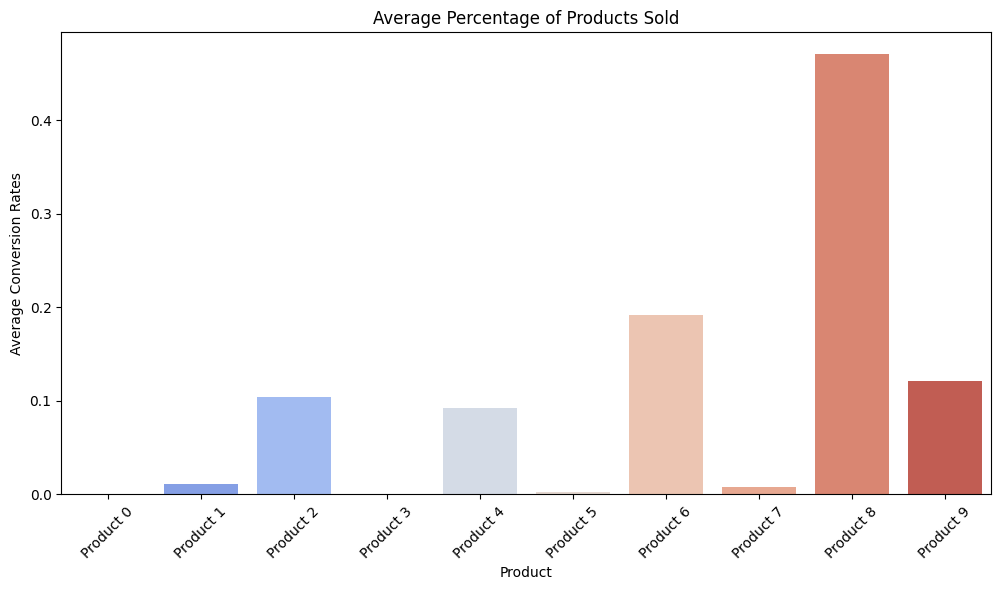

In [ ]:
pct_columns = ['pct_prod_0_cnvrt', 'pct_prod_1_cnvrt', 'pct_prod_2_cnvrt',
               'pct_prod_3_cnvrt', 'pct_prod_4_cnvrt', 'pct_prod_5_cnvrt',
               'pct_prod_6_cnvrt', 'pct_prod_7_cnvrt', 'pct_prod_8_cnvrt',
               'pct_prod_9_cnvrt']
pct_df = final_df[pct_columns]

# Create a list of product names (or labels) for the x-axis
product_labels = [f"Product {i}" for i in range(10)]

# Plot the conversion percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=product_labels, y=pct_df.mean(), palette='coolwarm')

plt.xlabel("Product")
plt.ylabel("Average Conversion Rates")
plt.title("Average Percentage of Products Sold")
plt.xticks(rotation=45)
plt.show()

`Visualization 2`: Histogram: Agent Tenure vs. Policy Conversions

<ipython-input-100-4fd363154fde>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_grouped = filtered_df.groupby(['tenure_bin', 'agent_gender'])['cnt_converted'].sum().reset_index()


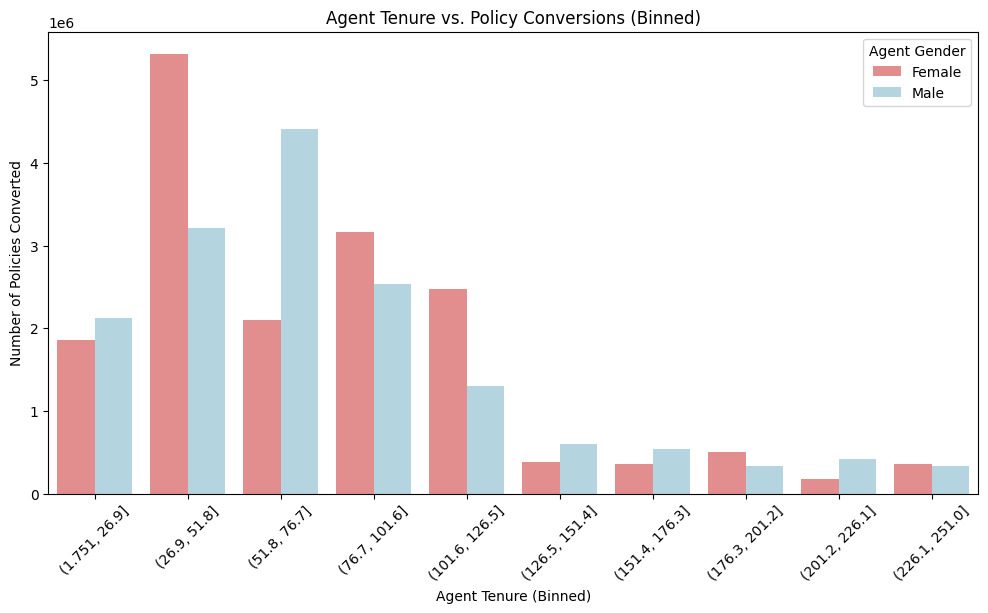

In [ ]:
# Filter out rows where agent_gender is 2 (unknown gender)
filtered_df = final_df[final_df['agent_gender'] != 2]

# Remove outliers based on percentiles (1st and 99th percentile)
lower_bound = filtered_df['agent_tenure'].quantile(0.01)  # Bottom 1%
upper_bound = filtered_df['agent_tenure'].quantile(0.99)  # Top 1%
filtered_df = filtered_df[(filtered_df['agent_tenure'] >= lower_bound) & (filtered_df['agent_tenure'] <= upper_bound)]

# Create 10 bins for agent_tenure
filtered_df['tenure_bin'] = pd.cut(filtered_df['agent_tenure'], bins=10)
tenure_grouped = filtered_df.groupby(['tenure_bin', 'agent_gender'])['cnt_converted'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=tenure_grouped, x='tenure_bin', y='cnt_converted', hue='agent_gender', palette={0.0: 'lightcoral', 1: 'lightblue'})

plt.xlabel("Agent Tenure (Binned)")
plt.ylabel("Number of Policies Converted")
plt.title("Agent Tenure vs. Policy Conversions (Binned)")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Female' if label == '0.0' else 'Male' for label in labels]
plt.legend(handles=handles, labels=labels, title="Agent Gender")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

`Visualization 3`: Trendline: Trend of Policy Lapse Rates Based on Socioeconomic Factors

(a) Economic Status

(b) Household Size Group

(c) Family Size Group


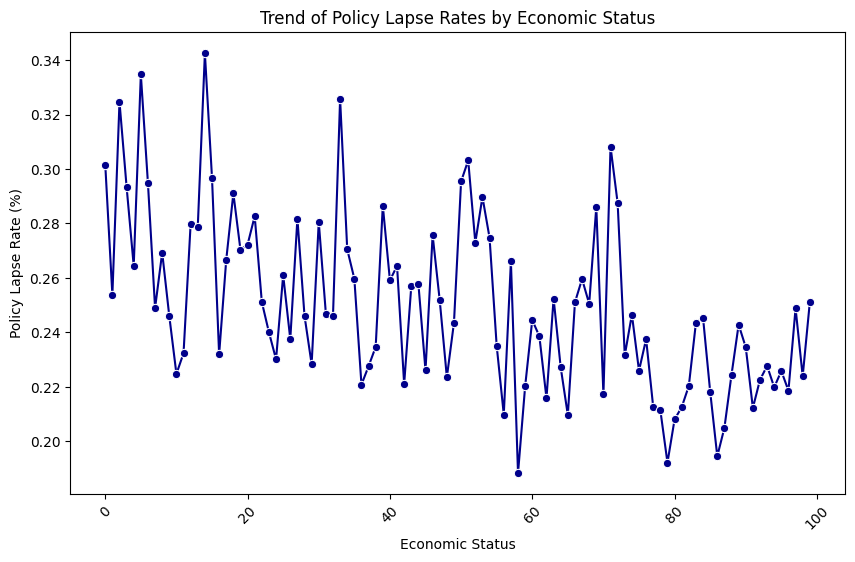

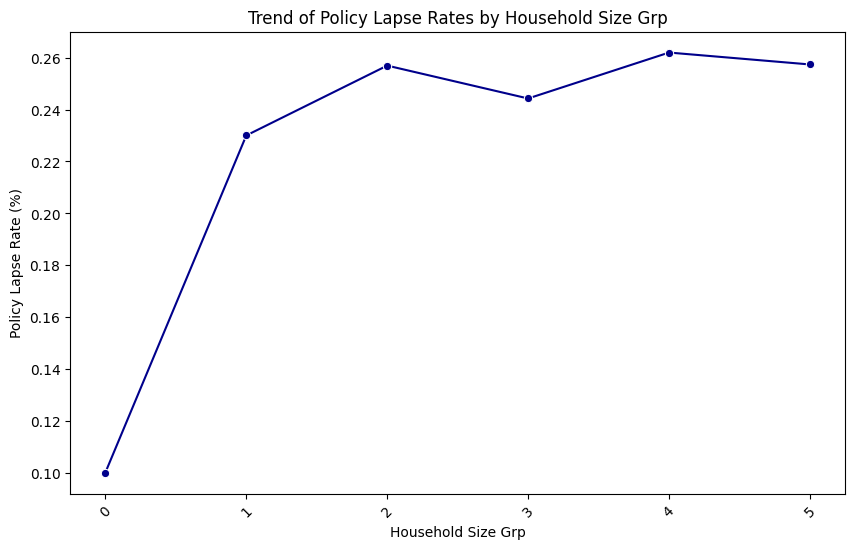

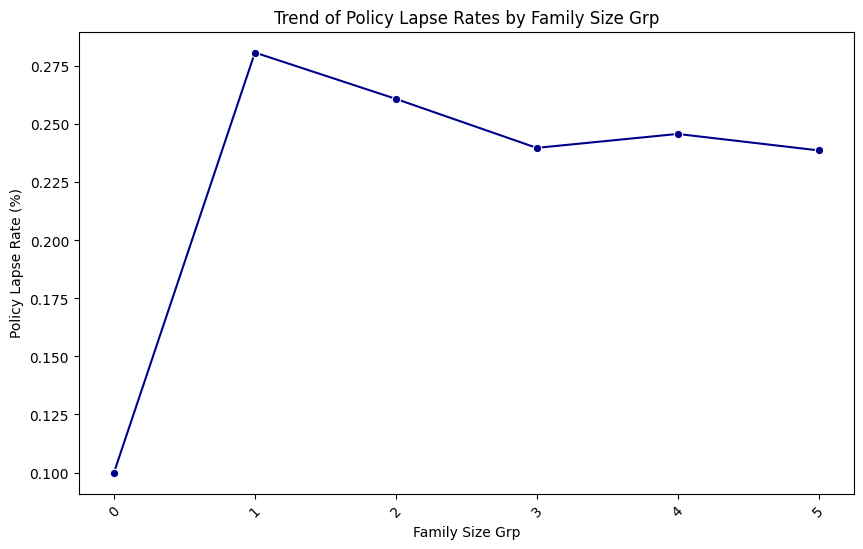

In [ ]:
grouping_factors = ['economic_status', 'household_size_grp', 'family_size_grp']

# Loop over the factors to generate plots
for factor in grouping_factors:
    plt.figure(figsize=(10, 6))

    # Group by the factor and calculate the average policy lapse rate
    lapse_rate_by_group = final_df.groupby(factor)['pct_lapsed'].mean().reset_index()

    # Plot the trend for this factor
    sns.lineplot(data=lapse_rate_by_group, x=factor, y='pct_lapsed', marker="o", color="darkblue")

    plt.xlabel(factor.replace('_', ' ').title())  # Converts to human-readable label
    plt.ylabel("Policy Lapse Rate (%)")
    plt.title(f"Trend of Policy Lapse Rates by {factor.replace('_', ' ').title()}")
    plt.xticks(rotation=45)
    plt.show()


## Step 4: Machine Learning Model Implementation and Evaluation

#### Step 4.1: Deciding On The Best Model To Use

After we have visualized our data, it is time to implement our Machine Learning model. Since the objective is to develop a model that recommends the best financial advisors for individual customers, this is considered to be a **classification** task. We can make use of a Supervised Machine Learning Model, such as in the form of Decision Trees.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 4.2: Decision Tree/Random Forest




A method that we can employ for this classification task is to use the Decision Tree model. A Decision Tree is a supervised machine learning algorithm that is commonly used for both classification and regression tasks. It models decisions and their possible consequences in a tree-like structure, resembling a flowchart or hierarchy of decisions. This model breaks down a dataset into subsets based on the features (input variables), making decisions step-by-step, with each decision leading to a further split of the data.

###### Step 4.2.1: Extracting The Relevant Features To Be Used For The Machine Learning Model

The first step is to extract all the relevant features to be used for the Decision Tree Machine Learning model. The variable `X` includes all the relevant independent variables while the varaible `Y` includes the response variable.

For the relevant features, we have extracted `cltsex`, `marryd`, `race_desc_map`, `economic_status`, `household_size_grp` and `family_size_grp` to be used for the independent variables and the column `agntnum` to be used as the response variable. This is because we are predicting the most suitable agent based on client's needs to be the success metric of the Decision Tree Machine Learning model.

In [ ]:
# Supervised Learning (Decision Tree & Random Forest)
features = ['cltsex', 'marryd', 'race_desc_map', 'economic_status',
            'household_size_grp', 'family_size_grp']

# Independent Variables - X
X = final_df[features]

# Response Variable - Y
y = final_df['agntnum']

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.2: Performing The Train-Test Split

Next, we need to perform the train-test split on the dataset. We will use 80% of the data to be the training set and the remaining 20% of the data to be the testing set. This can be done via the `train_test_split` method in `sklearn.model_selection`.

In [ ]:
# Importing the train_test_split method from sklearn
from sklearn.model_selection import train_test_split

# Performing The Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.3: Creating The Decision Tree Model

To create the Decision Tree model, we can initialize the `DecisionTreeClassifier()` method from `sklearn.tree`. Afterwards, we can fit the Decision Tree model on the training dataset. Subsequently, we can predict the different outcomes `y_pred` using the remaining 20% testing dataset `X_test`.

In [ ]:
# Importing The DecisionTreeClassifier Model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Initializing The Decision Tree Model
dt_model = DecisionTreeClassifier(random_state = 42, max_depth = 20)

# Fitting The Decision Tree Model On Training Dataset
dt_model.fit(X_train, y_train)

# Predicting The Outcomes On Test Dataset
y_pred = dt_model.predict(X_test)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.4: Creating The Confusion Matrix Of The Decision Tree Model

We can first display the confusion matrix for the outcomes of the Decision Tree model. A Confusion Matrix is a performance evaluation tool for classification models. It provides a detailed breakdown of the model's predictions by comparing actual versus the predicted values. This helps in understanding where the model makes correct and incorrect predictions.

To implement the confusion matrix, we need to use the `confusion_matrix` method from the `sklearn.metrics` package.

In [ ]:
# Importing confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# Creating The Confusion Matrix For Decision Tree
dt_matrix = confusion_matrix(y_test, y_pred)
dt_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.5: Evaluating The Accuracy Metrics Of The Decision Tree Model:



When evaluating the performance of a Machine Learning model, especially for classification tasks such as Decision Tree Models, several key metrics are used. Below is a description of the most commonly used metrics: **accuracy**, **recall**, **precision** and **F1-score**.

1) **Accuracy** - Accuracy measures the overall correctness of the model by calculating the proportion of correctly classified instances out of the total number of instances.

                 Accuracy = (TP + TN) / (TP + FP + TN + FN)

2) **Precision** - Precision measures how many of the predicted positive cases were actually positive. It is also known as Positive Predictive Value (PPV).

                 Precision = TP / (TP + FP)

3) **Recall** - Recall measures how many actual positive cases were correctly predicted.

                 Recall = TP / (TP + FN)

4) **F1-Score** - The F1-score is the harmonic mean of precision and recall, providing a balanced metric when there is an uneven class distribution.

                 F1-Score = 2 * ((Precision * Recall) / (Precision + Recall))


where:

TP (True Positives): Correctly predicted positive cases

TN (True Negatives): Correctly predicted negative cases

FP (False Positives): Incorrectly predicted positive cases

FN (False Negatives): Incorrectly predicted negative cases

We can rely on the `accuracy_score`, `precision_score`, `recall_score` and `f1_score` methods from the `sklearn.metrics` package to perform the computations.

In [ ]:
# Importing The Necessary Metrices To Consider from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculating The Accuracy, Precision, Recall and F1-Scores of Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)
dt_recall = recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)
dt_f1 = f1_score(y_test, y_pred, average = 'weighted')

# Printing The Scores
print("Decision Tree Model Accuracy:", round(dt_accuracy, 4))
print("Decision Tree Model Precision:", round(dt_precision, 4))
print("Decision Tree Model Recall:", round(dt_recall, 4))
print("Decision Tree Model F1-Score:", round(dt_f1, 4))

Decision Tree Model Accuracy: 0.1798
Decision Tree Model Precision: 0.1532
Decision Tree Model Recall: 0.1798
Decision Tree Model F1-Score: 0.1508


The accuracy metrices of the Decision Tree model is less than 0.2, which is rather low. For 10 clients, only around 2 agents are predicted correctly. The accuracy metrics scores are highly concerning and we need to devise strategies to improve the accuracy of the Decision Tree model which will be done in subsequent steps.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.6: Determining The Runtime Of The Decision Tree Model

Not only do we need to consider the accuracy of the model, we also need to consider other aspects such as runtime (efficiency) to gauge the effectiveness of the model. Runtime refers to the time it takes for a machine learning model to execute specific operations, such as training, inference (prediction), and evaluation. It is a key factor in assessing the efficiency and feasibility of a model, especially for real-time applications. We require the model to have sufficiently fast runtime in order to be deemed suitable.

To calculate the runtime of the Decision Tree model, we need to import `time` from the time package. We also require a start time and an end time for the Decision Tree training and evaluation processes.

In [ ]:
# Importing Time
import time

# Start timer
start_time = time.time()

# Decision Tree Process In Step 4.2.3
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Stop timer
end_time = time.time()

# Time Difference Calculation
time_diff_dt = end_time - start_time

print(f"Decision Tree RunTime: {time_diff_dt:.2f} seconds")

Decision Tree RunTime: 1.87 seconds


The runtime of the Decision Tree model is around 2 to 3 seconds.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.7: Creating The Random Forest Model

A Random Forest is a versatile and powerful ensemble machine learning model used for both classification and regression tasks. It is an improvement over decision trees, designed to reduce overfitting and improve predictive performance. The model builds multiple decision trees during training and combines their outputs to make more robust and accurate predictions.

Random Forest is an ensemble method, which means it combines the predictions of multiple models (decision trees in this case) to achieve better performance.
Each tree in the forest is trained on a slightly different subset of the data, and the final prediction is derived by aggregating the predictions of all the trees (e.g., majority voting for classification, averaging for regression).

To implement the Random Forest model, we need to use the `RandomForestClassifier` method from `sklearn.ensemble`. Afterwards, we perform similar steps - training, fitting, predicting and evaluating for the Random Forest model.

In a Random Forest model, `n_estimators` refers to the number of individual decision trees that the model will build and use for making predictions. We set a default value of 10.

In [ ]:
# Importing The Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Initializing The Random Forest Model
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

# Fitting The Random Forest Model On Training Dataset
rf_model.fit(X_train, y_train)

# Predicting The Outcomes On Test Dataset
rf_pred = rf_model.predict(X_test)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.8: Creating The Confusion Matrix Of The Random Forest Model

In [ ]:
# Creating The Confusion Matrix For Random Forest
rf_matrix = confusion_matrix(y_test, rf_pred)
rf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.9: Evaluating The Accuracy Metrics Of The Random Forest Model:

Similar to the Decision Trees, we can evaluate the accuracy, precision, recall and F1-Scores of the Random Forest model using `accuracy_score`, `precision_score`, `recall_score` and `f1_score` respectively.

In [ ]:
# Calculating The Accuracy, Precision, Recall and F1-Scores of Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average = 'weighted', zero_division = 0)
rf_recall = recall_score(y_test, rf_pred, average = 'weighted', zero_division = 0)
rf_f1 = f1_score(y_test, rf_pred, average = 'weighted')

# Printing The Scores
print("Random Forest Model Accuracy:", round(rf_accuracy, 4))
print("Random Forest Model Precision:", round(rf_precision, 4))
print("Random Forest Model Recall:", round(rf_recall, 4))
print("Random Forest Model F1-Score:", round(rf_f1, 4))

Random Forest Model Accuracy: 0.2159
Random Forest Model Precision: 0.1962
Random Forest Model Recall: 0.2159
Random Forest Model F1-Score: 0.1909


We observe that the accuracy, precision, recall and F1-score of the Random Forest model is also around 0.2 to 0.25, similar to the Decision Tree model. The accuracy metrics scores are highly concerning and we need to devise strategies to improve the accuracy of the Random Forest model which will be done in subsequent steps.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.10: Evaluating The Runtime Of The Random Forest Model:


Similarly, we can evaluate the runtime of the Random Forest Model using the `time` method.

In [ ]:
# Importing Time
import time

# Start timer
start_time = time.time()

# Random Forest Process In Step 4.2.7
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Stop timer
end_time = time.time()

# Time Difference Calculation
time_diff_rf = end_time - start_time

print(f"Random Forest RunTime: {time_diff_rf:.2f} seconds")

Random Forest RunTime: 18.20 seconds


The runtime of the Random Forest Model is around 20 seconds, which is much longer than the Decision Tree model of around 5 seconds. This is expected as a Random Forest is an ensemble learning method, meaning it builds many decision trees (as specified by the n_estimators parameter). The runtime increases proportionally to the number of trees. If the Random Forest has 100 trees, for instance, it needs to train and make predictions with each of those 100 trees, compared to just a single tree in the Decision Tree model.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Step 4.2.11: Testing The Random Forest Model

After implementing the Decision Tree and Random Forest model, we can subsequently test the models. We will choose the Random Forest Model as an example to illustrate.

We need to define a function that helps to recommend the most suitable agent from the various characteristics of the clients (the independent variables). Given the clients sex, marriage status, race, economic status, household size group category and family size group category.

In [ ]:
# Define The Recommendation Function
def recommend_best_agent(customer_features):
    customer_df = pd.DataFrame([customer_features])
    predicted_agent = rf_model.predict(customer_df)
    return predicted_agent[0]

# Example Customer Input (2 customers)
customer_one_features = {'cltsex': 1, 'marryd': 1, 'race_desc_map': 0,
                         'economic_status': 50, 'household_size_grp': 2,
                         'family_size_grp': 2}

customer_two_features = {'cltsex': 0, 'marryd': 2, 'race_desc_map': 1,
                         'economic_status': 20, 'household_size_grp': 5,
                         'family_size_grp': 4}

# Finding Their Recommended Agents
recommended_agent_one = recommend_best_agent(customer_one_features)
recommended_agent_two = recommend_best_agent(customer_two_features)

print("Recommended Financial Advisor For Customer One:", recommended_agent_one)
print("Recommended Financial Advisor For Customer Two:", recommended_agent_two)

Recommended Financial Advisor For Customer One: 7258
Recommended Financial Advisor For Customer Two: 304


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 6: Machine Learning Model Optimization

As our accuracy of the unoptimised Random Forest model is around 0.2, which is considered low, we can make use of several optimization strategies to boost our Machine Learning Model.

The Four Optimization Strategies Include:

**1) Hyperparameter Tuning Via Grid Search CV**

**2) Hyperparameter Tuning Via Randomized Search CV**

**3) Bagging**

**4) Boosting Using XGBoost Model**


----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 6.1: Optimizing Via Hyperparameter Tuning - GridSearchCV

`GridSearchCV` is a hyperparameter tuning technique in scikit-learn that automates the process of finding the optimal hyperparameters for a machine learning model. It performs an exhaustive search over a specified grid of hyperparameter values using cross-validation to evaluate model performance.

There are several parameters that we can use fot the `GridSearchCV` process - `n_estimators`, `max_depth` and `min_samples_split.`

`n_estimators`: Defines as the number of trees in the Random Forest.

`max_depth`: The maximum depth of each decision tree.

`min_samples_split`: The minimum number of samples required to split an internal node.

We can define lists of possible values for each of the three parameters `n_estimators`, `max_depth` and `min_samples_split` for `GridSearchCV` to serach for the most optimal parameter values that give the highest accuracy.


In [ ]:
# Importing GridSearchCV for sklearn
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for Random Forest
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6]
}

After defining the possible parameter values for the `n_estimators`, `max_depth` and `min_samples_split`, we can perform the `GridSearchCV` using a default `random_state` of 42 with a `scoring` metric of accuracy. Afterwards, we can fit the model using the `.fit()` method subsequently obtain the best parameter values using the `.best_params` method.

In [ ]:
# Performing GridSearchCV Using The Parameter Values Defined Above
rf_grid = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid,
                       cv = 3, scoring = 'accuracy')

# Fitting The Model
rf_grid.fit(X_train, y_train)

# Printing Out The Best parameters
print("Best parameters:", rf_grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

After obtaining the optimal parameters, we can use the parameter values obtained to be placed as the parameters for the `RandomForestClassifier` Model when initializing the `RandomForestClassifier`. Subsequently, we can fit the model using the training set and predict using the test set. (Similar to the unoptimized model, just using the optimal parameters found earlier).

In [ ]:
# Train the optimized model using optimal parameters obtained
rf_model_optimized = RandomForestClassifier(**rf_grid.best_params_, random_state=42)

# Fit the model on the trainig dataset
rf_model_optimized.fit(X_train, y_train)

# Predict the outcomes using the test set
rf_pred_optimized = rf_model_optimized.predict(X_test)

Similarly, we can evaluate the accuracy metrics of the optimized Random Forest model via GridSearchCV using the `accuracy_score`, `precision_score`, `recall_score` and `f1_score` from `sklearn.metrics`.

In [ ]:
# Evaluating The Accuracy Metrices Of Random Forest Optimized GridSearcCV Model
rf_accuracy = accuracy_score(y_test, rf_pred_optimized)
rf_precision = precision_score(y_test, rf_pred_optimized, average = 'weighted', zero_division = 0)
rf_recall = recall_score(y_test, rf_pred_optimized, average = 'weighted', zero_division = 0)
rf_f1 = f1_score(y_test, rf_pred_optimized, average = 'weighted')

# Printing The Scores
print("Random Forest GridSearchCV Model Accuracy:", round(rf_accuracy, 4))
print("Random Forest GridSearchCV Model Precision:", round(rf_precision, 4))
print("Random Forest GridSearchCV Model Recall:", round(rf_recall, 4))
print("Random Forest GridSearchCV Model F1-Score:", round(rf_f1, 4))

We can also evaluate the runtime of the GridSearchCV Model.

In [ ]:
# Track Start Time
start_time = time.time()

rf_grid = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid,
                       cv = 5, scoring = 'accuracy')
rf_grid.fit(X_train, y_train)
rf_model_optimized = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf_model_optimized.fit(X_train, y_train)
rf_pred_optimized = rf_model_optimized.predict(X_test)

# Track End Time
end_time = time.time()

# Time Difference Calculation
time_diff_gscv = end_time - start_time

print(f"GridSearchCV RunTime: {time_diff_gscv:.2f} seconds")

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 6.2: Optimizing Via Hyperparameter Tuning - RandomizedSearchCV

RandomizedSearchCV is a hyperparameter tuning technique in scikit-learn that searches for the best combination of hyperparameters by randomly sampling from a predefined distribution, rather than exhaustively searching all possible combinations like GridSearchCV.

Firstly, a range or distribution for each hyperparameter is defined. Instead of testing all possible combinations, it selects a random subset of combinations.
The model is trained and evaluated using cross-validation on each sampled combination. The best hyperparameter combination is chosen based on a specified scoring metric (e.g., accuracy, F1-score).

The other steps are exactly the same as the GridSearchCV model.

In [ ]:
# Importing RandomizedSearchCV fom sklearn
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution for RandomizedSearchCV
param_dist_r = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10)
}

In [ ]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state = 42),
                                   param_dist_r, n_iter = 20, cv = 5,
                                   scoring = 'accuracy')

# Fitting The Model
random_search.fit(X_train, y_train)

# Printing Out The Best parameters
print("Best Parameters:", random_search.best_params_)

In [ ]:
# Train the optimized model using optimal parameters obtained
rf_model_optimized_two = RandomForestClassifier(**random_search.best_params_,
                                                random_state = 42)

# Fit the model on the trainig dataset
rf_model_optimized_two.fit(X_train, y_train)

# Predict the outcomes using the test set
rf_pred_optimized_two = rf_model_optimized_two.predict(X_test)

In [ ]:
# Evaluating The Accuracy Metrices Of Random Forest Optimized GridSearcCV Model
rf_accuracy = accuracy_score(y_test, rf_pred_optimized_two)
rf_precision = precision_score(y_test, rf_pred_optimized_two, average = 'weighted', zero_division = 0)
rf_recall = recall_score(y_test, rf_pred_optimized_two, average = 'weighted', zero_division = 0)
rf_f1 = f1_score(y_test, rf_pred_optimized_two, average = 'weighted')

# Printing The Scores
print("Random Forest RandomizedSearchCV Model Accuracy:", round(rf_accuracy, 4))
print("Random Forest RandomizedSearchCV Model Precision:", round(rf_precision, 4))
print("Random Forest RandomizedSearchCV Model Recall:", round(rf_recall, 4))
print("Random Forest RandomizedSearchCV Model F1-Score:", round(rf_f1, 4))

In [ ]:
# Track Start Time
start_time = time.time()

random_search = RandomizedSearchCV(RandomForestClassifier(random_state = 42),
                                   param_dist_r, n_iter = 20, cv = 5,
                                   scoring = 'accuracy')
random_search.fit(X_train, y_train)
rf_model_optimized_two = RandomForestClassifier(**random_search.best_params_,
                                                random_state = 42)
rf_model_optimized_two.fit(X_train, y_train)
rf_pred_optimized_two = rf_model_optimized_two.predict(X_test)

# Track End Time
end_time = time.time()

# Time Difference Calculation
time_diff_rscv = end_time - start_time

print(f"RandomizedSearchCV RunTime: {time_diff_rscv:.2f} seconds")

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 6.3: Bagging

Bagging (Bootstrap Aggregating) is an ensemble learning technique that improves the accuracy and robustness of machine learning models by combining multiple predictions from different models trained on random subsets of the dataset. It helps reduce variance, prevent overfitting, and enhance the overall performance of the model.

First, we need to create a certain number of iterations, n_iterations, using a subset of the data rows in the dataset with replacement.

Repeating the Bagging process n times will cause the Random Forest model to fit n times, predict n times and have the corresponding n accuracy values. Hence, we need to store all the accuracy values into a list called `accuracies_bagging`.

In [ ]:
# Set the deafult number of iterations of the bagging process
n_iterations = 10

# Create lists for the accuracy metrices
accuracies_bagging = []
precision_bagging = []
recall_bagging = []
f1_score_bagging = []

Afterwards, for every iteration, we need to create the Random Forest model using `RandomForestClassifier` with m estimators. (m rows of data will be extracted from the dataset for every bagging process). Subseuquently, the m randomly chosen datasets will undergo the fitting process (training data) and the prediction process (testing data) and its accuracy will be calculated.

Lastly, we will take the average value of accuracy by taking the sum of accuracy values in the accuracies_bagging list over the number of elements in the `accuracies_bagging` list, which is n.

In [ ]:
# Track Start Time
start_time = time.time()

# Perform bagging technique multiple times
for i in range(n_iterations):

    # Initiate RandomForestClassifier Model
    bagging_model = RandomForestClassifier(n_estimators = 50)

    # Fit And Train Model, Predict Afterwards
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)

    # Evaluating The Accuracy Metrices
    model_accuracy = accuracy_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)
    model_recall = recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)
    model_f1 = f1_score(y_test, y_pred, average = 'weighted')

    # Appending The Values Of Accuracy Metrices Into The Respective Lists
    accuracies_bagging.append(model_accuracy)
    precision_bagging.append(model_precision)
    recall_bagging.append(model_recall)
    f1_score_bagging.append(model_f1)

# Track End Time
end_time = time.time()

# Time Difference Calculation
time_diff_bagging = end_time - start_time

print(f"Bagging RunTime: {time_diff_bagging:.2f} seconds")

The accuracy of the Random Forest model might differ depending on two factors, the number of iterations `n_iterations` of the Bagging process, as well as the value of the number of data rows that are selected for each iteration of the Bagging process `n_estimators`. We set the `n_iterations` and `n_estimators` to default values of 10 and 50 respectively.

Similarly, we can evaluate the accuracy metrics and for the Bagging Optimized Random Forest model.

In [ ]:
# Determining the accuracy metrices of the Random Forest model with Bagging
print(f"Random Forest Bagging Accuracy : {sum(accuracies_bagging) / len(accuracies_bagging):.4f}")
print(f"Random Forest Bagging Precision : {sum(precision_bagging) / len(precision_bagging):.4f}")
print(f"Random Forest Bagging Recall : {sum(recall_bagging) / len(recall_bagging):.4f}")
print(f"Random Forest Bagging F1-Score : {sum(f1_score_bagging) / len(f1_score_bagging):.4f}")

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Step 6.4: Boosting Using XGBoost Model

XGBoost (short for Extreme Gradient Boosting) is a popular and powerful machine learning algorithm that is based on the gradient boosting technique. It is particularly used for supervised learning tasks, such as classification and regression.

Gradient boosting is an ensemble technique where multiple weak learners (usually decision trees) are combined to create a strong predictive model.
Each new tree tries to correct the errors made by the previous trees in the ensemble. It works by optimizing a loss function (e.g., mean squared error for regression tasks) by gradually adding trees that improve predictions.

XGBoost incorporates L1 (Lasso) and L2 (Ridge) regularization to avoid overfitting. This is a key feature that distinguishes it from other gradient boosting methods.

In [ ]:
!pip install xgboost >/dev/null 2>&1

In XGBoost, two important hyperparameters that control the model's complexity and learning dynamics are `learning_rate` and `max_depth`.

The `learning_rate` controls the step size at each iteration while moving toward a minimum of the loss function. It determines how much the model should adjust the weights after each tree is added to the model.

The `max_depth` parameter controls the maximum depth of each decision tree. The depth of a tree is the number of nodes from the root to the deepest leaf, which is directly related to the complexity and expressive power of the tree.

We set a default `learning_rate` of 0.1 and `max_depth` of 10 for the Random Forest Model.

In [ ]:
# Importing XGBClassifier from xgboost
from xgboost import XGBClassifier

In [ ]:
# Track Start Time
start_time = time.time()

# Initialize The XGBClassifier Model
xgb_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1,
                          max_depth = 10, random_state = 42)

# Fitting the model on the training dataset
xgb_model.fit(X_train, y_train)

# Predicting the outcomes using the test set
xgb_pred = xgb_model.predict(X_test)

# Track End Time
end_time = time.time()

# Time Difference Calculation
time_diff_xg = end_time - start_time

print(f"XGBoost RunTime: {time_diff_xg:.2f} seconds")

Similarly, we can evaluate the accuracy metrices for the XGBClassifier model.

In [ ]:
# Determining the accuracy metrics for the XGBClassifier
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average = 'weighted', zero_division = 0)
xgb_recall = recall_score(y_test, xgb_pred, average = 'weighted', zero_division = 0)
xgb_f1 = f1_score(y_test, xgb_pred, average = 'weighted')

# Printing The Scores
print("XGBoost Model Accuracy:", xgb_accuracy)
print("XGBoost Model Precision:", xgb_precision)
print("XGBoost Model Recall:", xgb_recall)
print("XGBoost Model F1-Score:", xgb_f1)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 7: Ethical Use Of Data Discussion

There are certain ethical considerstions that we need to think of when training the Machine Learning model using Decision Trees when predicting the most suitable agent for a client. When developing a model like a decision tree to recommend the best financial advisor (agent) for a customer, it is important to address several ethical considerations to ensure fairness, privacy, and transparency.

1) **Avoiding Discriminatory Practices**: A decision tree model may inadvertently reflect existing biases in the dataset. For example, if the model is trained on historical data that has been influenced by bias related to race, gender, age, or marital status, the recommendations may perpetuate these biases, leading to unfair treatment of certain customer groups.

2) **Ethical Models:** It is crucial to ensure that the model does not discriminate against customers or agents based on sensitive characteristics (e.g., gender, race, marital status). Methods like fairness constraints or bias detection should be integrated into the model development process to ensure that the predictions are equitable and unbiased.

3) **Transparency:** Decision trees are considered relatively interpretable models, but even so, it is important to ensure that stakeholders (customers, financial advisors, etc) can understand how the model makes its decisions. This transparency will help prevent mistrust and misinterpretation of recommendations.

4) **Handling Missing or Incomplete Data:** If the model encounters missing or incomplete data (e.g., missing values for a customer's age or product group), it is important to handle this ethically. Imputation methods should be chosen that do not unfairly distort the model's predictions, and transparency in these choices should be maintained.

5) **Data Adjustments:** The dataset has undergone slight adjustments to numerical values and has masked product names to maintain privacy. While this is beneficial for data security, care must be taken to ensure that these modifications do not inadvertently affect the model's performance or lead to misleading conclusions.

6) **Informed Consent:** Customers whose data is being used for model training must have provided informed consent, understanding how their data will be utilized. This is important for ensuring that they are aware of how their financial information is being used to match them with advisors.

7) **Model Accountability:** It is important that customers and stakeholders can request an explanation for the model's decisions, particularly if they feel the model's recommendation is not suited to their needs. Models that offer explanations, such as decision trees, allow for greater accountability compared to black-box models.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion:

The implementation of a Decision Tree model for financial advisor-client matching highlighted the potential of machine learning to optimize policy conversions and customer engagement. By utilizing structured data processing, feature engineering, and predictive modeling, we gained valuable insights to enhance financial advisory services.

Despite challenges such as handling missing data, mitigating overfitting, and ensuring computational efficiency, the application of data cleaning, feature selection, and hyperparameter tuning improved model performance. Feature importance analysis identified key factors influencing policy conversions, reinforcing the value of data-driven decision-making.

A key takeaway is that structured preprocessing—such as encoding categorical variables and normalizing numerical data—was crucial for improving predictive accuracy. The decision tree model, chosen for its interpretability, was an effective method for this task.

Ethical considerations, including addressing bias and ensuring transparency in model recommendations, are vital for fairness in real-world applications. Overall, this project demonstrated the feasibility of using data science to enhance financial services and provided a scalable framework for future improvements in the domain.